## Importing Required Libraries

In [1]:
# supressing warnings

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# for dataframe manipulation 
import pandas as pd
pd.set_option('display.max_columns',500)

# for basic operations
import numpy as np

# for detecting encoding scheme
import chardet

# for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# for Linear Regression 
import statsmodels.api as sm
import sklearn 

# for splitting data into train and test data
from sklearn.model_selection import train_test_split

# for scaling 
from sklearn.preprocessing import MinMaxScaler

# for RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# for measuring VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for calculating R-square value
from sklearn.metrics import r2_score

In [3]:
# identifying encoding scheme

def encoding(file):
    read = open(file,'rb').read()
    encode = chardet.detect(read).get('encoding')
    return encode

encoding('day.csv')

'ascii'

## Step 1.1: Reading and Understanding Data

In [4]:
# reading data

data = pd.read_csv('dayCopy.csv',encoding='ascii')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# inspecting shape

data.shape

(730, 16)

In [6]:
# inspecting column info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# inspecting numerical columns

data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# inspecting categorical variables

data.describe(include='object')

,dteday
count,730
unique,730
top,25-02-2018
freq,1


In [9]:
# renaming columns

data.rename(columns={'yr':'year','mnth':'month','weathersit':'weather','hum':'humidity','cnt':'tot_demand'},inplace=True)
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,tot_demand
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# dropping unnecessary columns 

data.drop(['instant','dteday','casual','registered','temp'],axis=1,inplace=True)
data.head()

,season,year,month,holiday,weekday,workingday,weather,atemp,humidity,windspeed,tot_demand
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


The `instant` column is dropped as it only provides an index record, which is anyway provided by the pandas dataframe.
  
We drop the `dteday` column because it is redundant, we obtain the info about date from `mnth` and `yr` column  
  
`casual` and `registered` columns contribute to the data in the target column, and so the column is not essential for analysis

### Modifying data in categorical columns to appropriate datatype

In [11]:
# modifying data in 'Season' column 

data.season = data.season.replace([1,2,3,4],['spring','summer','fall','winter'])

# inspecting updated data

data.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [12]:
# modifying data in the 'month' column

data.month = data.month.replace([1,2,3,4,5,6,7,8,9,10,11,12],['january','february','march','april','may','june','july','august','september','october','november','december'])

# inspecting the updated values

data.month.unique()

array(['january', 'february', 'march', 'april', 'may', 'june', 'july',
       'august', 'september', 'october', 'november', 'december'],
      dtype=object)

In [13]:
# although not necessary to convert, but doing so for EDA. Will be encoding to binary in during Data Modelling

# modifying data in the 'year' column

data.year = data.year.replace([0,1],[2018,2019])

# inspecting updated values

data.year.unique()

array([2018, 2019])

In [14]:
# modifying data in the 'weekday' column

data.weekday = data.weekday.replace([0,1,2,3,4,5,6],['sunday','monday','tuesday','wednesday','thursday','friday','saturday'])

# inspecting updated data

data.weekday.unique()

array(['saturday', 'sunday', 'monday', 'tuesday', 'wednesday', 'thursday',
       'friday'], dtype=object)

In [15]:
# modifying data in the 'weather' column

data.weather = data.weather.replace([1,2,3],['Clear|Few_Clouds','Mist|Few_Cloud','L_Rain|L_Snow'])

# inspecting updated data

data.weather.unique()

array(['Mist|Few_Cloud', 'Clear|Few_Clouds', 'L_Rain|L_Snow'],
      dtype=object)

In [16]:
# inspecting categorical columns

data.describe(include='object')

,season,month,weekday,weather
count,730,730,730,730
unique,4,12,7,3
top,fall,december,monday,Clear|Few_Clouds
freq,188,62,105,463


## Step 1.2 : Visualising Data and Performing EDA

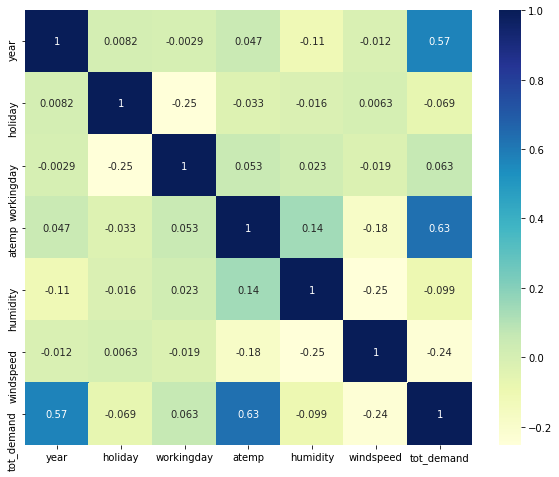

In [17]:
# inspecting the correlation between variables

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.show()

As we see, among the numerical columns `year` and `atemp` have a comparatively higher **positive correlation** with the target variable `tot_demand` and therefore we can base our estimation that   
1. **2019 had more demand than 2018 and**  
2. **Customers likely to ride bikes in partly warm weather**

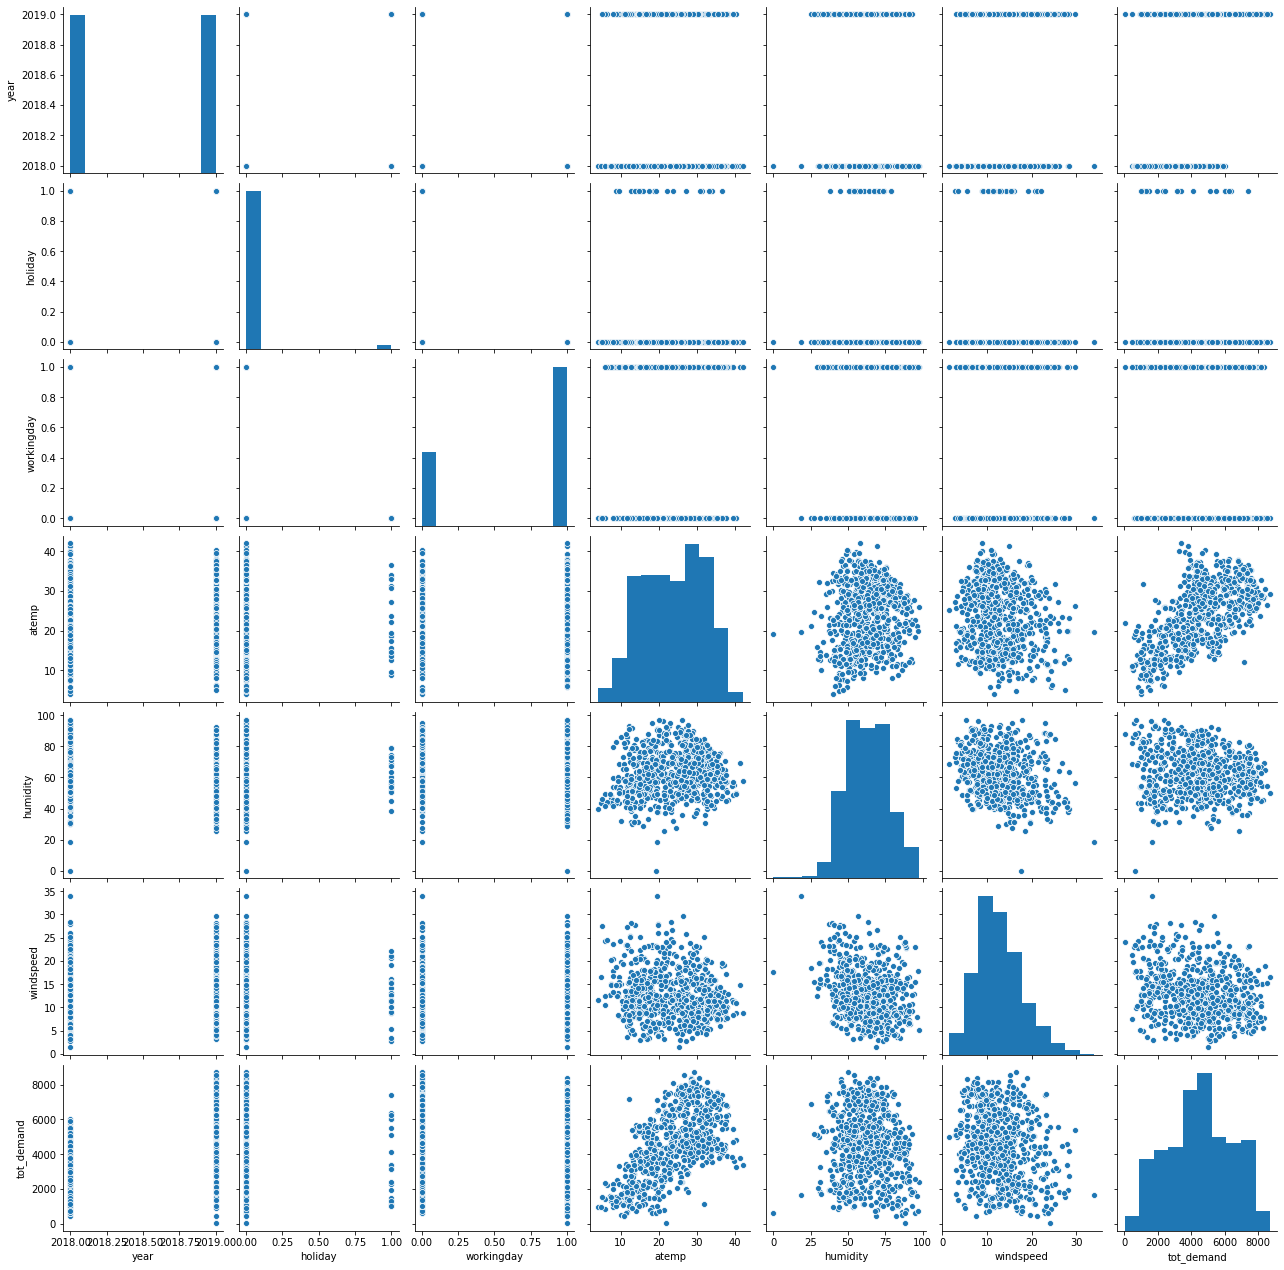

In [18]:
# visualising pairplot between dependent and independent variables 

sns.pairplot(data)
plt.show()

From the above pairplot we can infer that   
1. 2019 had more demand compared to 2018
2. `atemp` has a posotive linear relationship with the target variable `tot_demand`  
3. And majority of the variance in `humidity` is explained approx. after 35 and that of windspeed before 25.

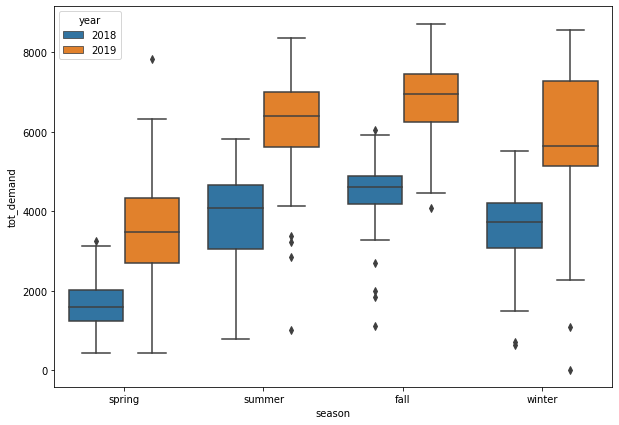

In [19]:
# visualising season wrt demands 

plt.figure(figsize=(10,7))
sns.boxplot(x=data.season,y=data.tot_demand,hue=data.year)
plt.show()

As we can see, ``2019`` has fairly **more demand than** ``2018`` and the median for demands in the `fall` is **maximum** and that for `spring` is **minimum** for both the years.

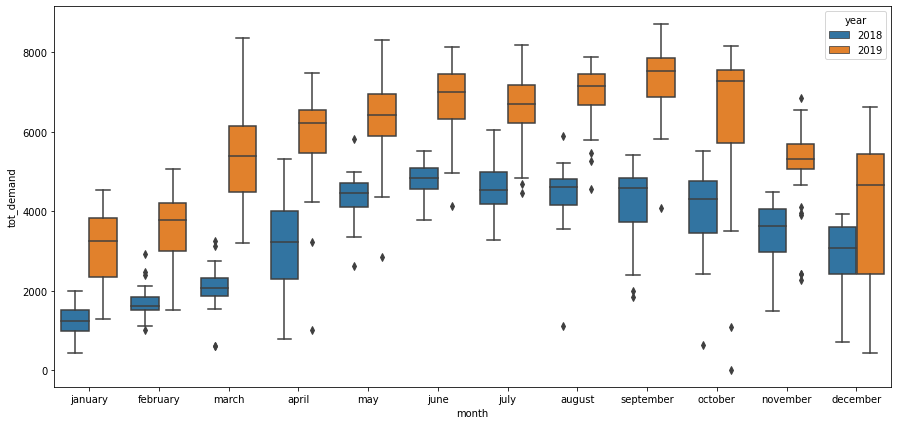

In [20]:
# visualising month column 

plt.figure(figsize=(15,7))
sns.boxplot(x=data.month,y=data.tot_demand,hue=data.year)
plt.show()

**Demand** for bikes was **Low** in the **begining of the year and gradually started increasing** and was **maximum** during `August`,`September` and `October` for the year `2019` and **decreased** after `November`.   
  
The **demand** for bikes was comparatively steady during `August` and `September`. While it was varied in `December` and `March.`

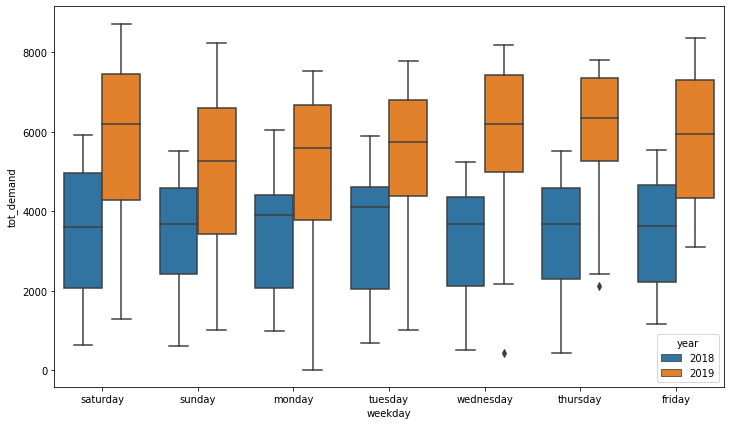

In [21]:
# visualising weekday column

plt.figure(figsize=(12,7))
sns.boxplot(x=data.weekday,y=data.tot_demand,hue=data.year)
plt.show()

**Demand** for bikes is seen to be **more** on `Saturday`,`Wednesday` and `Thursday` than on other days.

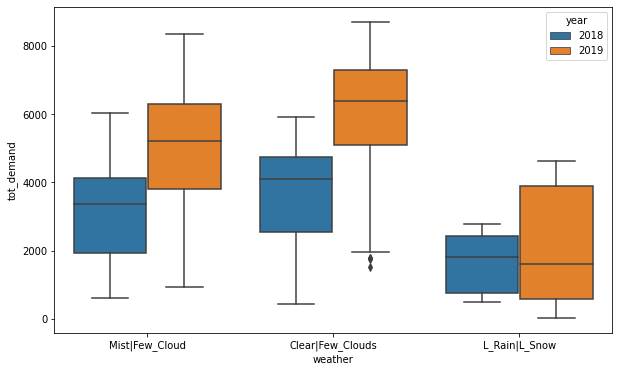

In [22]:
# visualising weather data

plt.figure(figsize=(10,6))
sns.boxplot(x=data.weather,y=data.tot_demand,hue=data.year)
plt.show()

People prefer to ride bikes when the weather is **Clear** or **Partially Cloudy** and not when it is **Raining** or **Snowing**.

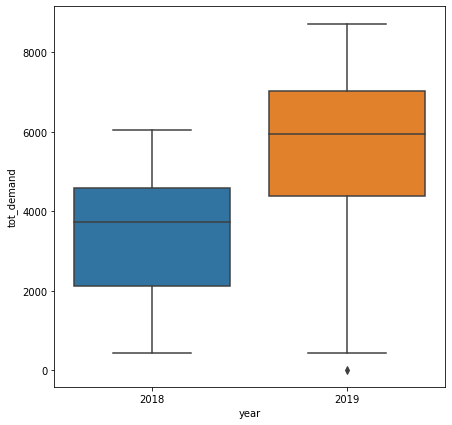

In [23]:
# visualising year column

plt.figure(figsize=(7,7))
sns.boxplot(x=data.year,y=data.tot_demand)

From the above comparision drawn between `years` and `tot_demand`, and also from the previous charts we see that **2019** has more demand than **2018**.

## Step 2 : Data Modelling 

### Step 2.1 :Creating dummy variables for all the categorical variables

In [24]:
# creating dummy variables for season 

season_1 = pd.get_dummies(data.season,drop_first=True)

# inspecting dummy variable dataframe

season_1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


`000` corresponds to **Fall**  
`100` corresponds to **Spring**    
`010` corresponds to **Summer**  
`001` corresponds to **Winter**  

In [25]:
# merging season dummy variable dataframe with primary dataframe

data = pd.concat([data,season_1],axis=1)

# inspecting updated dataframe

data.head()

,season,year,month,holiday,weekday,workingday,weather,atemp,humidity,windspeed,tot_demand,spring,summer,winter
0,spring,2018,january,0,saturday,0,Mist|Few_Cloud,18.18125,80.5833,10.749882,985,1,0,0
1,spring,2018,january,0,sunday,0,Mist|Few_Cloud,17.68695,69.6087,16.652113,801,1,0,0
2,spring,2018,january,0,monday,1,Clear|Few_Clouds,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,2018,january,0,tuesday,1,Clear|Few_Clouds,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,2018,january,0,wednesday,1,Clear|Few_Clouds,11.46350,43.6957,12.522300,1600,1,0,0


In [26]:
# dropping season column 

data.drop('season',axis=1,inplace=True)

# inspecting updated dataframe

data.head()

,year,month,holiday,weekday,workingday,weather,atemp,humidity,windspeed,tot_demand,spring,summer,winter
0,2018,january,0,saturday,0,Mist|Few_Cloud,18.18125,80.5833,10.749882,985,1,0,0
1,2018,january,0,sunday,0,Mist|Few_Cloud,17.68695,69.6087,16.652113,801,1,0,0
2,2018,january,0,monday,1,Clear|Few_Clouds,9.47025,43.7273,16.636703,1349,1,0,0
3,2018,january,0,tuesday,1,Clear|Few_Clouds,10.60610,59.0435,10.739832,1562,1,0,0
4,2018,january,0,wednesday,1,Clear|Few_Clouds,11.46350,43.6957,12.522300,1600,1,0,0


In [27]:
# creating dummy variables for month

month_1 = pd.get_dummies(data.month,drop_first=True)

# inspecting dummy variable dataframe for month 

month_1.head()

,august,december,february,january,july,june,march,may,november,october,september
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [28]:
# merging dummy variable dataframe and primary dataframe

data = pd.concat([data,month_1],axis=1)

# inspecting updated dataframe 

data.head()

,year,month,holiday,weekday,workingday,weather,atemp,humidity,windspeed,tot_demand,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september
0,2018,january,0,saturday,0,Mist|Few_Cloud,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2018,january,0,sunday,0,Mist|Few_Cloud,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2018,january,0,monday,1,Clear|Few_Clouds,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2018,january,0,tuesday,1,Clear|Few_Clouds,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2018,january,0,wednesday,1,Clear|Few_Clouds,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


Dropped value `April` with encoding value `00000000000`

In [29]:
# dropping month column 

data.drop('month',axis=1,inplace=True)

# inspecting updated dataframe

data.head()

,year,holiday,weekday,workingday,weather,atemp,humidity,windspeed,tot_demand,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september
0,2018,0,saturday,0,Mist|Few_Cloud,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2018,0,sunday,0,Mist|Few_Cloud,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2018,0,monday,1,Clear|Few_Clouds,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2018,0,tuesday,1,Clear|Few_Clouds,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2018,0,wednesday,1,Clear|Few_Clouds,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [30]:
# creating dummy variabels for weekday 

weekday_1 = pd.get_dummies(data.weekday,drop_first=True)

# inspecting dummy variable dataframe for weekday

weekday_1.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


Dropped value `Friday` with encoding value `000000`

In [31]:
# merging dummy variable dataframe with primary dataframe

data = pd.concat([data,weekday_1],axis=1)

# inspecting updated dataframe

data.head()

,year,holiday,weekday,workingday,weather,atemp,humidity,windspeed,tot_demand,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
0,2018,0,saturday,0,Mist|Few_Cloud,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2018,0,sunday,0,Mist|Few_Cloud,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2018,0,monday,1,Clear|Few_Clouds,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2018,0,tuesday,1,Clear|Few_Clouds,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2018,0,wednesday,1,Clear|Few_Clouds,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
# dropping weekday column 

data.drop('weekday',axis=1,inplace=True)

# inspecting updated dataframe

data.head()

,year,holiday,workingday,weather,atemp,humidity,windspeed,tot_demand,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
0,2018,0,0,Mist|Few_Cloud,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2018,0,0,Mist|Few_Cloud,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2018,0,1,Clear|Few_Clouds,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2018,0,1,Clear|Few_Clouds,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2018,0,1,Clear|Few_Clouds,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
# creating dummy variable for weather column 

weather_1 = pd.get_dummies(data.weather,drop_first=True)

# inspecting dummy variable dataframe

weather_1.head()

,L_Rain|L_Snow,Mist|Few_Cloud
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


Dropped value `Clear|Few_Clouds` with encoding value `000`

In [34]:
# merging dummy variable dataframe with primary dataframe

data = pd.concat([data,weather_1],axis=1)

# inspecting updated dataframe

data.head()

,year,holiday,workingday,weather,atemp,humidity,windspeed,tot_demand,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,L_Rain|L_Snow,Mist|Few_Cloud
0,2018,0,0,Mist|Few_Cloud,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2018,0,0,Mist|Few_Cloud,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2018,0,1,Clear|Few_Clouds,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,Clear|Few_Clouds,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2018,0,1,Clear|Few_Clouds,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
# dropping weekday column 

data.drop('weather',axis=1,inplace=True)

# inspecting updated dataframe

data.head()

,year,holiday,workingday,atemp,humidity,windspeed,tot_demand,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,L_Rain|L_Snow,Mist|Few_Cloud
0,2018,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2018,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2018,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2018,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
# modifying data in the year column 

data.year = data.year.replace([2018,2019],[0,1])

# inspecting updated dataframe

data.head()

,year,holiday,workingday,atemp,humidity,windspeed,tot_demand,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,L_Rain|L_Snow,Mist|Few_Cloud
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Step 2.2 : Dividing data into Train and Test data

In [37]:
# splitting data into training and testing data

data_train , data_test = train_test_split(data,train_size=0.7,random_state=100)

In [38]:
# inspecting data_train and data_test shape

print(data_train.shape)
print(data_test.shape)

(510, 29)
(220, 29)


### Step 2.3 : Scaling numerical data 

In [39]:
# creating an object of MinMaxScaler class

scaler = MinMaxScaler()

In [40]:
# scaling all numeric variables except binary and dummy variables 

num_vars = ['atemp','humidity','windspeed']

In [41]:
# scaling numeric variables

data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

# inspecting dataframe

data_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,tot_demand,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,L_Rain|L_Snow,Mist|Few_Cloud
576,1,0,1,0.766351,0.725633,0.264686,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
# inspecting numerical columns 

data_train.describe()

,year,holiday,workingday,atemp,humidity,windspeed,tot_demand,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,L_Rain|L_Snow,Mist|Few_Cloud
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,4485.337255,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,1950.666077,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,4530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


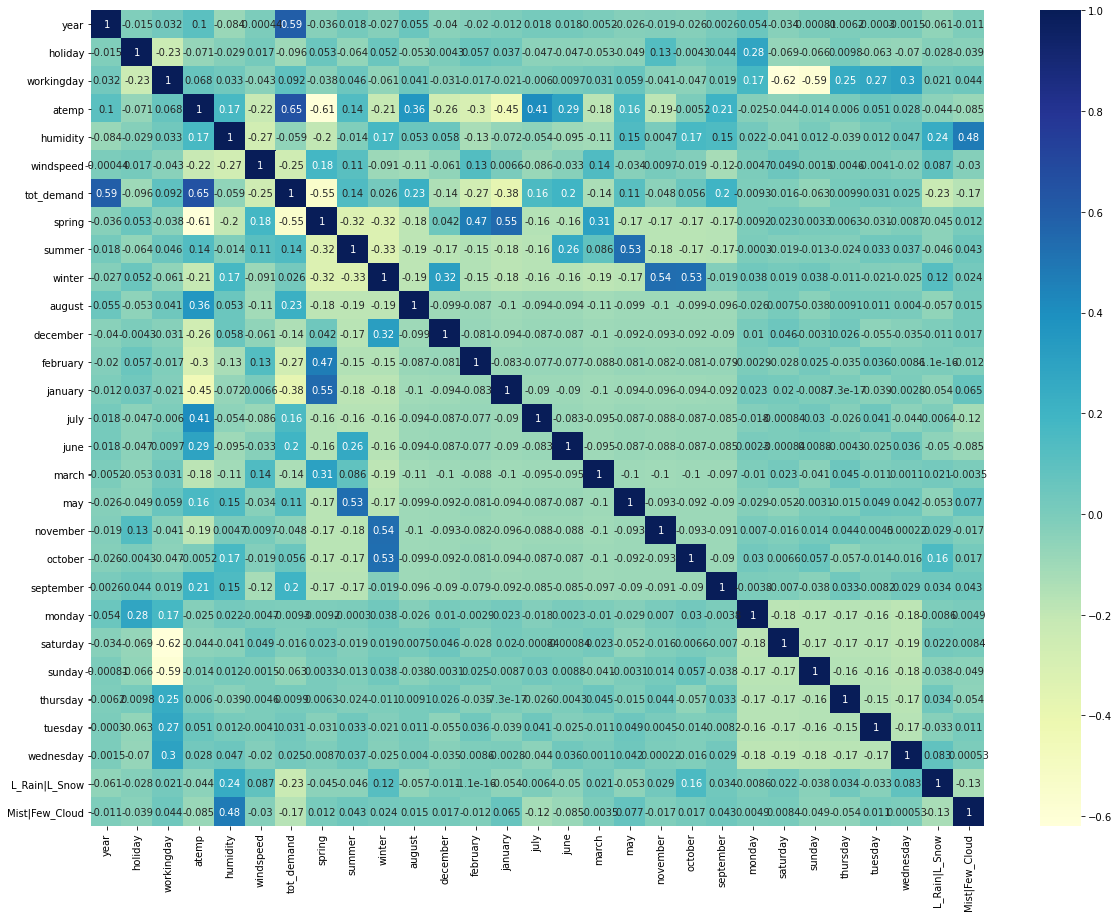

In [43]:
# identifying correlation between variables 

plt.figure(figsize=(20,15))
sns.heatmap(data_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [44]:
# creating X and y variables

X_train = data_train
y_train = data_train.pop('tot_demand')

## Step 3 : Data Modelling and Evaluation 

### Step 3.1 : Using RFE to select top 15 columns 

In [45]:
# creating a LinearRegression object 

lr = LinearRegression()

# fitting the model on the train data

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# implementing RFE on the LinearRegression model

rfe = RFE(lr,15)
rfe = rfe.fit(X_train,y_train)

In [47]:
# viewing the top 15 variables 

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('august', True, 1),
 ('december', False, 2),
 ('february', True, 1),
 ('january', True, 1),
 ('july', False, 7),
 ('june', False, 6),
 ('march', False, 14),
 ('may', False, 5),
 ('november', False, 3),
 ('october', False, 13),
 ('september', True, 1),
 ('monday', False, 9),
 ('saturday', True, 1),
 ('sunday', False, 8),
 ('thursday', False, 11),
 ('tuesday', False, 10),
 ('wednesday', False, 12),
 ('L_Rain|L_Snow', True, 1),
 ('Mist|Few_Cloud', True, 1)]

In [48]:
# viewing columns selected by applying RFE

cols = X_train.columns[rfe.support_]
cols

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'summer', 'winter', 'august', 'february', 'january', 'september',
       'saturday', 'L_Rain|L_Snow', 'Mist|Few_Cloud'],
      dtype='object')

In [49]:
# viewing columns rejected by applying RFE

X_train.columns[~rfe.support_]

Index(['spring', 'december', 'july', 'june', 'march', 'may', 'november',
       'october', 'monday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

### Step 3.2 : Developing model based on the variables selected by RFE

In [50]:
# creating the training dataset with RFE selected models

X_train_rfe = X_train[cols]

In [51]:
# adding a constant variable 

X_train_lm_1 = sm.add_constant(X_train_rfe)

# inspecting updated dataset 

X_train_lm_1

,const,year,holiday,workingday,atemp,humidity,windspeed,summer,winter,august,february,january,september,saturday,L_Rain|L_Snow,Mist|Few_Cloud
576,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.438975,0.640189,0.255342,0,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.391735,0.504508,0.188475,1,0,0,0,0,0,1,0,1
111,1.0,0,0,1,0.318819,0.751824,0.380981,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.824359,0.679690,0.187140,0,0,1,0,0,0,0,0,0
53,1.0,0,0,1,0.218747,0.435939,0.111379,0,0,0,1,0,0,0,0,0
350,1.0,0,0,0,0.223544,0.577930,0.431816,0,1,0,0,0,0,1,0,1
79,1.0,0,0,1,0.434043,0.759870,0.529881,1,0,0,0,0,0,0,0,1


In [52]:
# creating model

lr_1 = sm.OLS(y_train,X_train_lm_1)

In [53]:
# fitting model

lr_model_1 = lr_1.fit()

In [54]:
# inspecting model 

lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tot_demand   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.05e-188
Time:                        21:59:57   Log-Likelihood:                -4114.0
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     494   BIC:                             8328.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1941.5554    277.775      6.990      0.000    1395.790    2487.321
year            2009.1043     70.507     28.495      0.000    1870.573    2147.636
holiday         -450.8379    237.306     -1.900      0.058    -917.091      15.415
workingday       377.1841    101.676      3.710      0.000     177.413     576.955
atemp           4493.1640    249.178     18.032      0.000    4003.585    4982.743
humidity       -1404.2770    327.222     -4.292      0.000   -2047.195    -761.359
windspeed      -1487.0688    224.555     -6.622      0.000   -1928.270   -1045.868
summer           761.8646    105.050      7.252      0.000     555.464     968.265
winter          1065.4285    112.537      9.467      0.000     844.317    1286.540
august           526.8773    141.354      3.727      0.000     249.149     804.606
february        -241.4266    172.574     -1.399      0.162    -580.497      97.644
january         -465.1398    169.740     -2.740      0.006    -798.642    -131.638
september       1028.9596    141.718      7.261      0.000     750.515    1307.404
saturday         447.4891    128.190      3.491      0.001     195.624     699.354
L_Rain|L_Snow  -2078.7433    229.390     -9.062      0.000   -2529.444   -1628.042
Mist|Few_Cloud  -495.7646     91.295     -5.430      0.000    -675.138    -316.391
==============================================================================
Omnibus:                       60.174   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.014
Skew:                          -0.595   Prob(JB):                     1.32e-34
Kurtosis:                       5.434   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`R-square` value obtained by the model is `84.3%` which shows that the variables selected have explained the data well and the `p-values` for **most of the variabels** are **0.00** and therefore can be considered **significant**, but for variables such as `holiday` and `february` the values are **above 5%**.   
  
Next, we do a `VIF` check to determine **collinearity**.

In [55]:
# calculating VIF values 

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,humidity,22.78
3,atemp,13.21
2,workingday,5.15
5,windspeed,4.02
7,winter,2.41
6,summer,2.21
14,Mist|Few_Cloud,2.19
0,year,2.06
12,saturday,1.93
10,january,1.81


Creating a new model by dropping the `holiday` variable.

In [56]:
# dropping holiday

X_train_rfe.drop('holiday',axis=1,inplace=True)

In [57]:
# adding constant

X_train_lm_2 = sm.add_constant(X_train_rfe)

In [58]:
# creating model 

lr_2 = sm.OLS(y_train,X_train_lm_2)

In [59]:
# fitting model 

lr_model_2 = lr_2.fit()

In [60]:
# inspecting model

lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tot_demand   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.44e-188
Time:                        21:59:57   Log-Likelihood:                -4115.8
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     495   BIC:                             8325.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1868.6411    275.835      6.774      0.000    1326.690    2410.593
year            2010.5989     70.689     28.443      0.000    1871.712    2149.486
workingday       443.8273     95.684      4.638      0.000     255.830     631.825
atemp           4501.0410    249.799     18.019      0.000    4010.244    4991.838
humidity       -1394.6691    328.044     -4.251      0.000   -2039.199    -750.139
windspeed      -1492.7462    225.126     -6.631      0.000   -1935.067   -1050.425
summer           763.4580    105.323      7.249      0.000     556.522     970.394
winter          1058.1349    112.768      9.383      0.000     836.572    1279.698
august           527.1383    141.726      3.719      0.000     248.680     805.596
february        -253.2583    172.916     -1.465      0.144    -592.998      86.481
january         -474.7522    170.112     -2.791      0.005    -808.982    -140.522
september       1011.5565    141.794      7.134      0.000     732.965    1290.148
saturday         514.9206    123.502      4.169      0.000     272.267     757.574
L_Rain|L_Snow  -2071.4323    229.962     -9.008      0.000   -2523.254   -1619.611
Mist|Few_Cloud  -493.2440     91.525     -5.389      0.000    -673.070    -313.418
==============================================================================
Omnibus:                       66.115   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.007
Skew:                          -0.637   Prob(JB):                     8.17e-40
Kurtosis:                       5.617   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see, the dropping `holiday` has not impacted the `R-square` value, and has almost remained constant to `84.2%`. 

In [61]:
# inspecting VIF value

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,humidity,22.56
2,atemp,13.18
1,workingday,4.62
4,windspeed,3.98
6,winter,2.40
5,summer,2.21
13,Mist|Few_Cloud,2.18
0,year,2.06
11,saturday,1.81
9,january,1.80


Creating a new model by dropping `february`.

In [62]:
# dropping february 

X_train_rfe.drop('february',axis=1,inplace=True)

In [63]:
# adding constant

X_train_lm_3 = sm.add_constant(X_train_rfe)

In [64]:
# creating model 

lr_3 = sm.OLS(y_train,X_train_lm_3)

In [65]:
# fitting model 

lr_model_3 = lr_3.fit()

In [66]:
# inspecting model 

lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tot_demand   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.87e-189
Time:                        21:59:57   Log-Likelihood:                -4116.9
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1734.8343    260.566      6.658      0.000    1222.884    2246.784
year            2006.7192     70.721     28.375      0.000    1867.770    2145.668
workingday       448.3389     95.745      4.683      0.000     260.223     636.455
atemp           4656.1896    226.487     20.558      0.000    4211.197    5101.182
humidity       -1412.5035    328.196     -4.304      0.000   -2057.329    -767.678
windspeed      -1495.1499    225.380     -6.634      0.000   -1937.967   -1052.332
summer           819.0312     98.365      8.326      0.000     625.768    1012.294
winter          1132.3165    100.870     11.225      0.000     934.131    1330.502
august           554.6120    140.641      3.943      0.000     278.287     830.937
january         -364.3190    152.665     -2.386      0.017    -664.268     -64.370
september       1036.5852    140.923      7.356      0.000     759.706    1313.464
saturday         524.6874    123.464      4.250      0.000     282.110     767.265
L_Rain|L_Snow  -2063.7748    230.168     -8.966      0.000   -2515.999   -1611.551
Mist|Few_Cloud  -492.0644     91.627     -5.370      0.000    -672.090    -312.039
==============================================================================
Omnibus:                       62.768   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.141
Skew:                          -0.600   Prob(JB):                     2.53e-38
Kurtosis:                       5.590   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see, that dropping `february` has not impacted the `R-square` value and is constant at `84.2%`

In [67]:
# inspecting VIF values

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,humidity,19.69
2,atemp,11.71
1,workingday,4.59
4,windspeed,3.77
12,Mist|Few_Cloud,2.15
0,year,2.04
6,winter,2.02
5,summer,1.97
10,saturday,1.81
7,august,1.56


As `humidity` has a very high `VIF` value, we drop it. 

In [68]:
# dropping humidity

X_train_rfe.drop('humidity',axis=1,inplace=True)

In [69]:
# adding constant 

X_train_lm_4 = sm.add_constant(X_train_rfe)

In [70]:
# building model

lr_4 = sm.OLS(y_train,X_train_lm_4)

In [71]:
# fitting model 

lr_model_4 = lr_4.fit()

In [72]:
# inspecting model

lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tot_demand   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.96e-186
Time:                        21:59:57   Log-Likelihood:                -4126.3
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     497   BIC:                             8334.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            940.8923    187.239      5.025      0.000     573.014    1308.771
year            2039.8800     71.528     28.519      0.000    1899.345    2180.415
workingday       473.2490     97.240      4.867      0.000     282.196     664.302
atemp           4430.2664    224.170     19.763      0.000    3989.828    4870.705
windspeed      -1243.9305    221.495     -5.616      0.000   -1679.112    -808.749
summer           788.7241     99.827      7.901      0.000     592.589     984.859
winter          1041.5262    100.363     10.378      0.000     844.337    1238.715
august           537.1564    143.039      3.755      0.000     256.120     818.192
january         -416.2266    154.847     -2.688      0.007    -720.462    -111.991
september        983.6078    142.837      6.886      0.000     702.968    1264.247
saturday         566.2395    125.237      4.521      0.000     320.179     812.300
L_Rain|L_Snow  -2454.5078    215.202    -11.406      0.000   -2877.327   -2031.689
Mist|Few_Cloud  -717.3431     76.519     -9.375      0.000    -867.683    -567.003
==============================================================================
Omnibus:                       60.999   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.693
Skew:                          -0.602   Prob(JB):                     3.47e-35
Kurtosis:                       5.453   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We notice a drop in the `R-square` to `83.6%`, but as drop is very low we accept it.

In [73]:
# inspecting VIF value

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,atemp,6.22
1,workingday,4.31
3,windspeed,3.56
0,year,2.04
4,summer,1.93
9,saturday,1.76
5,winter,1.60
11,Mist|Few_Cloud,1.57
6,august,1.56
8,september,1.31


We observe from the **correlation heatmap** that the **correlation value** between `tot_demand` and `atemp` is  **high** as compared to other variables and dropping `atemp` causes the `R-square` value of the model to **drop** to **70.7%**, so we **do not drop** `atemp` variable, instead we drop `workingday`, whose **correlation value** is **very low (0.063)**.  

In [74]:
# dropping workingday

X_train_rfe.drop('workingday',axis=1,inplace=True)

In [75]:
# adding constant

X_train_lm_5 = sm.add_constant(X_train_rfe)

In [76]:
# building model

lr_5 = sm.OLS(y_train,X_train_lm_5)

In [77]:
# fitting model

lr_model_5 = lr_5.fit()

In [78]:
# inspecting model summary

lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tot_demand   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.65e-182
Time:                        21:59:58   Log-Likelihood:                -4138.2
No. Observations:                 510   AIC:                             8300.
Df Residuals:                     498   BIC:                             8351.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1299.2303    176.033      7.381      0.000     953.372    1645.088
year            2043.9259     73.134     27.948      0.000    1900.236    2187.616
atemp           4447.1316    229.192     19.404      0.000    3996.829    4897.434
windspeed      -1259.6353    226.459     -5.562      0.000   -1704.569    -814.702
summer           805.6809    102.013      7.898      0.000     605.252    1006.110
winter          1023.8805    102.557      9.984      0.000     822.383    1225.378
august           568.1028    146.116      3.888      0.000     281.022     855.183
january         -413.9294    158.334     -2.614      0.009    -725.014    -102.844
september        996.1944    146.031      6.822      0.000     709.282    1283.106
saturday         188.0633    100.428      1.873      0.062      -9.251     385.378
L_Rain|L_Snow  -2387.4124    219.598    -10.872      0.000   -2818.864   -1955.961
Mist|Few_Cloud  -692.0741     78.062     -8.866      0.000    -845.445    -538.703
==============================================================================
Omnibus:                       66.713   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.638
Skew:                          -0.683   Prob(JB):                     1.31e-35
Kurtosis:                       5.386   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# inspecting VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,atemp,4.97
2,windspeed,3.31
0,year,2.04
3,summer,1.91
4,winter,1.56
5,august,1.56
10,Mist|Few_Cloud,1.54
7,september,1.31
6,january,1.22
8,saturday,1.18


As for the analysis we need to select **10 variables** we drop `saturday`, as it has the **least positive coeff value**, and **contributes less** in determining the `tot_demand`

In [80]:
# dropping saturday

X_train_rfe.drop('saturday',axis=1,inplace=True)

In [81]:
# adding constant

X_train_lm_6 = sm.add_constant(X_train_rfe)

In [82]:
# building model

lr_6 = sm.OLS(y_train,X_train_lm_6)

In [83]:
# fitting model

lr_model_6 = lr_6.fit()

In [84]:
lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tot_demand   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.53e-183
Time:                        21:59:58   Log-Likelihood:                -4139.9
No. Observations:                 510   AIC:                             8302.
Df Residuals:                     499   BIC:                             8348.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1327.2388    175.836      7.548      0.000     981.769    1672.709
year            2039.7779     73.284     27.834      0.000    1895.795    2183.761
atemp           4436.7581    229.700     19.315      0.000    3985.460    4888.056
windspeed      -1240.4516    226.795     -5.469      0.000   -1686.042    -794.861
summer           805.3277    102.269      7.875      0.000     604.397    1006.258
winter          1027.2142    102.799      9.992      0.000     825.242    1229.186
august           575.6207    146.428      3.931      0.000     287.930     863.311
january         -410.9826    158.723     -2.589      0.010    -722.831     -99.134
september        998.4675    146.392      6.821      0.000     710.847    1286.088
L_Rain|L_Snow  -2381.4757    220.125    -10.819      0.000   -2813.963   -1948.989
Mist|Few_Cloud  -691.1442     78.256     -8.832      0.000    -844.896    -537.392
==============================================================================
Omnibus:                       61.830   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.086
Skew:                          -0.622   Prob(JB):                     2.11e-34
Kurtosis:                       5.398   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see a very insignificant drop in the `R-square` value to **82.7%** from **82.8%**.

In [85]:
# inspecting VIF 

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,atemp,4.95
2,windspeed,3.26
0,year,2.04
3,summer,1.91
4,winter,1.56
5,august,1.56
9,Mist|Few_Cloud,1.54
7,september,1.31
6,january,1.22
8,L_Rain|L_Snow,1.08


### Step 3.3 : Checking assumptions

In [86]:
# calculating residual values

y_train_pred = lr_model_6.predict(X_train_lm_6)

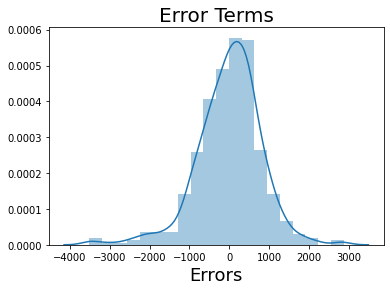

In [87]:
# plotting residuals

residuals = y_train-y_train_pred
sns.distplot(residuals,bins=20)
plt.title('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

We see the `Error terms` are **normally distributed** around `0`

### Step 3.4 : Model evaluation 

In [88]:
# scaling numeric variables

data_test[num_vars] = scaler.transform(data_test[num_vars])

In [89]:
# inspecting numerical columns

data_test[num_vars].describe()

,atemp,humidity,windspeed
count,220.000000,220.000000,220.000000
mean,0.532847,0.638221,0.313293
std,0.217401,0.148694,0.159584
min,0.025950,0.261915,-0.042808
25%,0.344870,0.529197,0.198843
50%,0.544652,0.625590,0.300126
75%,0.713308,0.743798,0.402718
max,0.980934,1.002146,0.807474


In [90]:
# defining variables

X_test = data_test
y_test = data_test.pop('tot_demand')

In [91]:
X_test_rfe = X_test[cols]

In [92]:
# adding constant

X_test_lm = sm.add_constant(X_test_rfe)

In [93]:
# dropping variables insignificant variables from the test dataset

X_test_lm.drop(['holiday','february','humidity','workingday','saturday'],axis=1,inplace=True)

In [94]:
# predicting demand value

y_test_pred = lr_model_6.predict(X_test_lm)

In [95]:
# calculating R-square value for train and test data

train_adj = r2_score(y_true=y_train,y_pred=y_train_pred)
test_adj = r2_score(y_true=y_test,y_pred=y_test_pred) 

print('R-Square Train data: ',round(train_adj,3))
print('R-Square Test data: ',round(test_adj,3))

R-Square Train data:  0.827
R-Square Test data:  0.79


We see that the **R-Squared** value obtained from `train dataset` is **0.83** and the value obtained from `test dataset` is **0.79**, thus we can conclude that the **model has performed well on the test set and what it had learned on the train set it has been able to genrealise it on the test set**.


We can see that the equation of our best fitted line is:

$ totdemand = 2039.78  \times  year + 4436.75  \times  atemp - 1240.45 \times windspeed + 805.32 \times summer + 1027.21 \times winter + 575.62 \times august - 410.98 \times january + 998.46 \times september - 2381.47 \times L_Rain|L_snow - 691.14  \times Mist|Few_Clouds $


## Recommendation 

1. From the analysis we can conclude that `year`,`atemp`,`summer`,`winter`,`august` and `september` **affect** the demand **positively**, i.e, as values of these variables increase the demand will increase to an extent. 
    
2. Out of the variables that affect the damand positively, `atemp`, `year`, and `winter` **affect the demand strongly**, in the mentioned order.
  
3. `windspeed`,`january`,`L_rain|L_snow` and `Mist|Few_clouds` **affect** the demand **negatively**, which means as there is an increase in these variables the demand will drop.
  
4. `L_rain|L_snow` and `windspeed` are the two most **strong negative influences** on the demand.